# <a id='toc1_'></a>[Proyek Analisis Data: [Air Quality]](#toc0_)
- **Nama:** [Muhammad Hafizh]
- **Email:** [mhafizh7121@gmail.com]
- **ID Dicoding:** [justhafizh]

## <a id='toc1_1_'></a>[Menentukan Pertanyaan Bisnis](#toc0_)

- Bagaimana pola peningkatan polusi udara dari waktu ke waktu?
- Bagaimana hubungan antara tingkat polusi udara dan kondisi lingkungan?
- Bagaimana Perbedaan kondisi lingkungan dari kota yang memiliki tingkat polusi tinggi dengan yang tidak? 

## <a id='toc1_2_'></a>[Import Semua Packages/Library yang Digunakan](#toc0_)

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc1_3_'></a>[Data Wrangling](#toc0_)

### <a id='toc1_3_1_'></a>[Gathering Data](#toc0_)

In [2]:
aotizhongxin_df = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping_df = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
dingling_df = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')
dongsi_df = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan_df = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
guncheng_df = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
huairou_df = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
nongzhanguan_df = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi_df = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
tiantan_df = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
wanliu_df = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')
wanshouxigong_df = pd.read_csv('data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

**Insight:**
- Data berupa beberapa file dengan tiap file mewakili satu kota dengan format file CVS pada folder data
- Dataset merupakan pengukuran kualitas udara tiap jam dari 12 kota berbeda dengan rentang waktu 1 Maret 2013 - 28 Februari 2017
- Data qualitas udara mencakup beberapa paramater 
    - partikel polutan
        - PM2.5, Partikel halus di udara dengan diameter <= 2,5 mikrometer (ug/m3)
        - PM10, Partikel udara berdiameter <= 10 mikrometer (ug/m3)
    - gas polutan
        - SO2, Gas beracun hasil pembakaran bahan bakar fosil (ug/m3)
        - NO2, Gas beracun emisi kendaraan bermotor dan pembangkit listrik (ug/m3)
        - CO, Gas beracun hasil pembakaran tidak sempurna (mg/m3)
        - O3, Terbentuk dari reaksi kimia NO2 dan senyawa organik volatil dibantu dengan sinar UV (ug/m3)
    - kondisi lingkungan 
        - TEMP (celcius)
        - PRES (hPa)
        - DEWP (Dew Point), titik embun (celcius)
        - Rain, Curah hujan (mm)
        - Wind Direction, arah angin (N, NNE, NE, ENE, E, ESE, SE, SSE, S, SSW, SW, WSW, W, WNW, NW, NNW)
        - WSPM(Water-Soluble Particular Matter), Komponen dari PM yang bisa larut dalam air (ug/m3)

**Berdasarkan standar kualitas udara ambien Tiongkok (GB 3095-2012)**

| **Polutan** | **Satuan** | **Rata-rata**       | **Kelas 1** (µg/m³ / mg/m³) | **Kelas 2** (µg/m³ / mg/m³) |
|-------------|------------|----------------------|-----------------------------|-----------------------------|
| **PM2.5**   | µg/m³      | 24 jam               | ≤ 35                        | ≤ 75                        |
|             |            | Tahunan              | ≤ 15                        | ≤ 35                        |
| **PM10**    | µg/m³      | 24 jam               | ≤ 50                        | ≤ 150                       |
|             |            | Tahunan              | ≤ 40                        | ≤ 70                        |
| **SO2**     | µg/m³      | 24 jam               | ≤ 50                        | ≤ 150                       |
|             |            | Tahunan              | ≤ 20                        | ≤ 60                        |
| **NO2**     | µg/m³      | 1 jam                | ≤ 200                       | ≤ 200                       |
|             |            | Tahunan              | ≤ 40                        | ≤ 40                        |
| **CO**      | mg/m³      | 1 jam                | ≤ 10                        | ≤ 10                        |
|             |            | 24 jam               | ≤ 4                         | ≤ 4                         |
| **O3**      | µg/m³      | 1 jam                | ≤ 160                       | ≤ 200                       |
|             |            | 8 jam                | ≤ 100                       | ≤ 160                       |

Kelas 1: untuk area sensitif seperti taman nasional, hutan, dan daerah konservasi alam.

Kelas 2: untuk daerah pemukiman, komersial, dan industri.


### <a id='toc1_3_2_'></a>[Assessing Data](#toc0_)

#### <a id='toc1_3_2_1'></a>[Assessing Autizhongxin Dataframe](#toc0_)

In [3]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [5]:
aotizhongxin_df.duplicated().sum()

np.int64(0)

In [6]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### <a id='toc1_3_2_2'></a>[Assesing Changping Dataframe](#toc0_)

In [7]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [9]:
changping_df.duplicated().sum() 

np.int64(0)

In [10]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### <a id='toc1_3_2_3'></a>[Assesing Dingling Dataframe](#toc0_)


In [11]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [12]:
dingling_df.isna().sum()    

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [13]:
dingling_df.duplicated().sum()

np.int64(0)

In [14]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### <a id='toc1_3_2_4'></a>[Assesing Dongsi Dataframe](#toc0_)

In [15]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [17]:
dongsi_df.duplicated().sum()

np.int64(0)

In [18]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### <a id='toc1_3_2_5'></a>[Assesing Guanyuan Dataframe](#toc0_)

In [19]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [21]:
guanyuan_df.duplicated().sum()

np.int64(0)

In [22]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### <a id='toc1_3_2_6'></a>[Assesing Gucheng Dataframe](#toc0_)

In [23]:
guncheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [24]:
guncheng_df.isna().sum()    

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [25]:
guncheng_df.duplicated().sum()

np.int64(0)

In [26]:
guncheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### <a id='toc1_3_2_7'></a>[Assesing Huairou Dataframe](#toc0_)

In [27]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [28]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [29]:
huairou_df.duplicated().sum()

np.int64(0)

In [30]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


#### <a id='toc1_3_2_8'></a>[Assesing Nongzhanguan Dataframe](#toc0_)

In [31]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [32]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [33]:
nongzhanguan_df.duplicated().sum()

np.int64(0)

In [34]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### <a id='toc1_3_2_9'></a>[Assesing Shunyi Dataframe](#toc0_)

In [35]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [36]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [37]:
shunyi_df.duplicated().sum()

np.int64(0)

In [38]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### <a id='toc1_3_2_10'></a>[Assesing Tiantan Dataframe](#toc0_)

In [39]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [41]:
tiantan_df.duplicated().sum()

np.int64(0)

In [42]:
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### <a id='toc1_3_2_11'></a>[Assesing Wanliu Dataframe](#toc0_)

In [43]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [44]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [45]:
wanliu_df.duplicated().sum()

np.int64(0)

In [46]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


#### <a id='toc1_3_2_12'></a>[Assesing Wanshouxigong Dataframe](#toc0_)

In [47]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [48]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [49]:
wanshouxigong_df.duplicated().sum()

np.int64(0)

In [50]:
wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**

- Data yang dimiliki tidak memiliki kesalahan tipe data, data duplikasi maupun inaccurate value
- terdapat missing value pada setiap dataframe pada kolom ; PM2.5, PM10, SO2, NO2, CO, O3, TEMP, DEWP, RAIN, WSPM



### <a id='toc1_3_3_'></a>[Cleaning Data](#toc0_)

In [51]:
#combine all dataframe
city_df = [aotizhongxin_df,changping_df,dingling_df,dongsi_df,guanyuan_df,guncheng_df,huairou_df,nongzhanguan_df,shunyi_df,tiantan_df,wanliu_df,wanshouxigong_df]
all_city_df = pd.concat(city_df, ignore_index=True)

#check null value
missing_columns = ["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]
all_city_df[all_city_df[missing_columns].isna().any(axis=1)]

#Interpolate colom pm2.5, pm10, so2, no2, co, o3, temp, pres, dewp, rain, wspm
all_city_df[missing_columns] = all_city_df[missing_columns].interpolate(method='linear', limit_direction='forward')

##interpolate wd
all_city_df.wd = all_city_df.wd.interpolate(method='ffill')

all_city_df.isna().sum()


C:\Users\mhafi\AppData\Local\Temp\ipykernel_13420\2185934937.py:13: FutureWarning: Series.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_city_df.wd = all_city_df.wd.interpolate(method='ffill')


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Missing value diisi dengan metode lineart interpolation untuk data time-series
- fill forwar untuk wind direction

## <a id='toc1_4_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

### <a id='toc1_4_1_'></a>[Explore ...](#toc0_)

In [52]:
all_city_df["date"] = pd.to_datetime(
    all_city_df[["year", "month", "day"]]
).dt.date

In [53]:
all_city_df["timestamp"] = pd.to_datetime(
    all_city_df[["year", "month", "day", "hour"]]
)
all_city_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,timestamp
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28,2017-02-28 19:00:00
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28,2017-02-28 20:00:00
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28,2017-02-28 21:00:00
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28,2017-02-28 22:00:00


In [54]:
all_city_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,timestamp
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


Hubungan Parameter Kondisi Lingkungan Dengan Polusi Udara

In [55]:
#list paramter air quality
air_quality_parameter = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3","TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
all_city_df[air_quality_parameter].select_dtypes(include=['number']).corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.878874,0.478223,0.664306,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,-0.271425
PM10,0.878874,1.000000,0.460572,0.645583,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,-0.178200
SO2,0.478223,0.460572,1.000000,0.495826,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,-0.108536
NO2,0.664306,0.645583,0.495826,1.000000,0.694036,-0.465912,-0.277279,0.176652,-0.032569,-0.043665,-0.395699
CO,0.780165,0.691887,0.522678,0.694036,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,-0.290413
O3,-0.149508,-0.110443,-0.165311,-0.465912,-0.306979,1.000000,0.592248,-0.446725,0.312980,0.023361,0.294351
TEMP,-0.131607,-0.096078,-0.320237,-0.277279,-0.324057,0.592248,1.000000,-0.813312,0.820247,0.037647,0.032601
PRES,0.019862,-0.018375,0.221235,0.176652,0.188045,-0.446725,-0.813312,1.000000,-0.750271,-0.060952,0.065400
DEWP,0.113045,0.067674,-0.266121,-0.032569,-0.060315,0.312980,0.820247,-0.750271,1.000000,0.086259,-0.296771
RAIN,-0.014452,-0.026505,-0.040028,-0.043665,-0.013281,0.023361,0.037647,-0.060952,0.086259,1.000000,0.020975


Rata Rata Tingkat Partikel Polutan dan Kondisi Lingkungan Perhari

In [56]:
all_city_df_day_month_year = all_city_df.groupby("date")[air_quality_parameter].mean(numeric_only=True)
all_city_df_day_month_year

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01,7.326389,12.203125,9.182292,20.581597,404.861111,68.244792,1.173958,1026.569792,-20.148611,0.0,2.917708
2013-03-02,31.475694,40.506944,31.757878,56.303763,939.715278,32.601112,0.260417,1026.552778,-16.271875,0.0,1.145139
2013-03-03,79.291667,111.104167,49.286458,75.661458,1771.142361,22.788194,5.257292,1014.215278,-12.325347,0.0,1.463194
2013-03-04,21.768569,40.359375,18.818692,40.877151,726.340278,56.833333,9.610764,1017.263194,-12.773264,0.0,2.227083
2013-03-05,125.352959,159.236111,70.756944,103.337674,2021.434028,79.527778,6.630556,1010.551389,-7.916319,0.0,0.992014
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-24,25.425347,38.647569,9.586806,44.674653,718.402778,45.703125,4.876736,1019.349306,-11.351736,0.0,1.902083
2017-02-25,11.357639,21.522569,5.550347,30.112847,466.145833,59.348958,7.040278,1017.160417,-10.586111,0.0,2.051042
2017-02-26,27.704861,44.939236,9.975694,50.321181,701.736111,42.274306,6.769097,1018.659375,-8.005556,0.0,1.601042


Rata Rata Tingkat Partikel Polutan dan Kondisi Lingkungan Perbulan

In [57]:
all_city_df["year_month"] = all_city_df["date"].astype(str).str[:7]  # Ambil format "YYYY-MM"
all_city_df_year_month = all_city_df.groupby("year_month")[air_quality_parameter].mean(numeric_only=True).reset_index()
all_city_df_year_month

,year_month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013-03,104.571909,130.249832,38.530270,67.281177,1449.916555,56.343421,5.992249,1012.224373,-6.682090,0.023768,1.886414
1,2013-04,62.207292,95.931510,20.686866,46.141377,893.442556,62.019991,12.380058,1007.811817,-3.203681,0.014294,2.333310
2,2013-05,81.876512,134.408462,26.376841,50.161956,999.638868,87.335402,21.676691,1002.652912,8.131384,0.005791,1.811694
3,2013-06,101.542242,115.859546,13.607299,48.107797,1336.573507,74.326906,23.583426,999.639838,17.440023,0.126528,1.287350
4,2013-07,66.839665,76.424118,7.273532,38.686568,983.447806,78.583951,27.108826,995.501680,20.902184,0.275448,1.316913
5,2013-08,60.588374,77.461302,6.903814,39.014629,885.594970,82.128581,26.904620,998.767932,20.016773,0.108871,1.382812
6,2013-09,76.140304,96.402862,10.196775,51.574292,1156.336891,47.868048,20.240683,1008.849711,14.360961,0.091204,1.171447
7,2013-10,91.765320,112.675042,15.604848,63.289317,1225.272486,27.941544,12.984017,1015.799754,5.070105,0.013934,1.258210
8,2013-11,73.821007,96.244676,21.838826,55.824141,1422.621653,23.815611,5.963900,1016.536910,-7.492697,0.000093,1.821146
9,2013-12,78.159890,96.066980,38.527883,60.240006,1699.831868,21.673963,0.054167,1019.612130,-13.814796,0.000000,1.728360


Rata Rata Polusi udara Per Musim

In [58]:
all_city_df_year_month["month"] = pd.to_datetime(all_city_df_year_month["year_month"]).dt.month
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

all_city_df_year_month["season"] = all_city_df_year_month["month"].apply(assign_season)

all_city_df_season = all_city_df_year_month.groupby("season")[air_quality_parameter].mean(numeric_only=True).reset_index()
all_city_df_season

,season,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Autumn,82.106965,103.288422,10.085047,55.583717,1251.343795,34.695561,12.998052,1014.113227,4.995777,0.061539,1.446030
1,Spring,77.167532,120.834597,18.922465,50.153369,985.751596,71.158529,15.053066,1008.219683,-0.293671,0.025448,2.071928
2,Summer,64.568047,80.926150,6.036308,36.872468,906.549659,93.023340,26.130347,999.566494,18.155328,0.165690,1.507716
3,Winter,95.689114,114.529587,28.826042,59.784763,1800.376351,29.665533,-0.300335,1021.308938,-13.216150,0.003860,1.898809


Rata Rata Polusi udara Per Kota

In [59]:
all_city_df_station = all_city_df.groupby("station")[air_quality_parameter].mean(numeric_only=True).reset_index()
all_city_df_station

,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Aotizhongxin,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,1.708577
1,Changping,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060293,1.854871
2,Dingling,66.845557,84.113713,11.797849,27.304331,925.111838,70.530792,13.671605,1007.771151,1.486924,0.060293,1.854871
3,Dongsi,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,1.860815
4,Guanyuan,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.581414,1011.851650,3.120296,0.067383,1.708577
5,Gucheng,84.074802,119.261567,15.705821,55.836004,1338.100060,58.000001,13.855824,1008.835693,2.600351,0.064374,1.343667
6,Huairou,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173,12.430556,1007.612315,2.218761,0.067950,1.652772
7,Nongzhanguan,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876,13.668250,1012.551871,2.445126,0.063983,1.860815
8,Shunyi,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.375531,1013.071937,2.450821,0.061010,1.807784
9,Tiantan,82.033097,106.537076,14.510018,53.258828,1305.333262,56.148077,13.668250,1012.551871,2.445126,0.063983,1.860815


Rata Rata Polusi Udara Pertiap Jam dalam sehari

In [60]:
all_city_df_day = all_city_df.groupby("hour")[air_quality_parameter].mean(numeric_only=True).reset_index()
print(all_city_df_day.describe())
all_city_df_day

            hour      PM2.5        PM10        SO2        NO2           CO  \
count  24.000000  24.000000   24.000000  24.000000  24.000000    24.000000   
mean   11.500000  79.839718  104.910268  15.913090  50.600220  1235.682649   
std     7.071068   5.522142   10.036467   2.075793   6.897359   121.097892   
min     0.000000  73.424078   92.371314  12.795053  38.533816  1011.614961   
25%     5.750000  75.509343   97.325119  14.901158  46.000652  1145.781269   
50%    11.500000  77.134446  101.002525  15.436708  51.928559  1273.993046   
75%    17.250000  85.261912  112.824901  17.407224  54.864820  1333.928474   
max    23.000000  89.032249  123.381469  19.657236  60.570259  1377.964402   

               O3       TEMP         PRES       DEWP       RAIN       WSPM  
count   24.000000  24.000000    24.000000  24.000000  24.000000  24.000000  
mean    57.237872  13.531692  1010.753337   2.482421   0.064428   1.730034  
std     26.820837   3.044756     0.935191   0.592090   0.021012   

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,0,87.696481,115.206576,15.138782,57.860154,1376.587941,42.057909,11.281286,1011.172239,3.138281,0.068138,1.357729
1,1,86.848406,112.031010,15.159580,55.689336,1377.964402,38.381854,10.816535,1011.110142,3.171927,0.052647,1.321957
2,2,84.803844,107.648670,14.916881,53.314190,1327.441592,34.542478,10.364590,1011.058360,3.113476,0.066159,1.282390
3,3,82.212727,102.659579,13.741630,52.250121,1275.936632,32.323738,9.967084,1010.992626,3.025596,0.093401,1.257089
4,4,79.465989,97.945965,13.250695,51.606996,1246.701409,30.723837,9.640465,1010.992752,2.903290,0.069479,1.234681
5,5,76.538028,94.000502,12.827728,50.626231,1255.430381,28.839288,9.415369,1011.144631,2.822847,0.052031,1.248681
6,6,74.289174,92.371314,12.795053,50.806444,1272.049460,27.689135,9.612895,1011.405864,2.813115,0.044627,1.292625
7,7,73.424078,94.006330,13.275031,52.633513,1298.724184,25.884621,10.506137,1011.748851,2.750386,0.039973,1.411051
8,8,74.403840,98.552736,14.853987,54.287546,1342.035501,27.530761,11.880879,1012.027821,2.627185,0.038763,1.569932
9,9,76.061597,100.988080,17.375883,52.716468,1333.891685,35.112930,13.470641,1012.105950,2.413079,0.044125,1.782914


**Insight:**
- Korelasi positif Partikel halus dengan gas polutan (terutama NO2 dan CO)
- Tidak ada pengaruh singnifikan dari kondisi lingkungan dengan partikel halus dan gas polusi
- Terkhusus gas polutan O3 berkorelasi positif dengan suhu lingkungan
- Gas polutan SO, NO2 dan CO saling berkorelasi positif

## <a id='toc1_5_'></a>[Visualization & Explanatory Analysis](#toc0_)

### <a id='toc1_5_1_'></a>[Pertanyaan 1: Bagaimana pola peningkatan polusi udara dari waktu ke waktu?](#toc0_)

RATA RATA PENINGKATAN POLUSI UDARA DALAM SEHARI

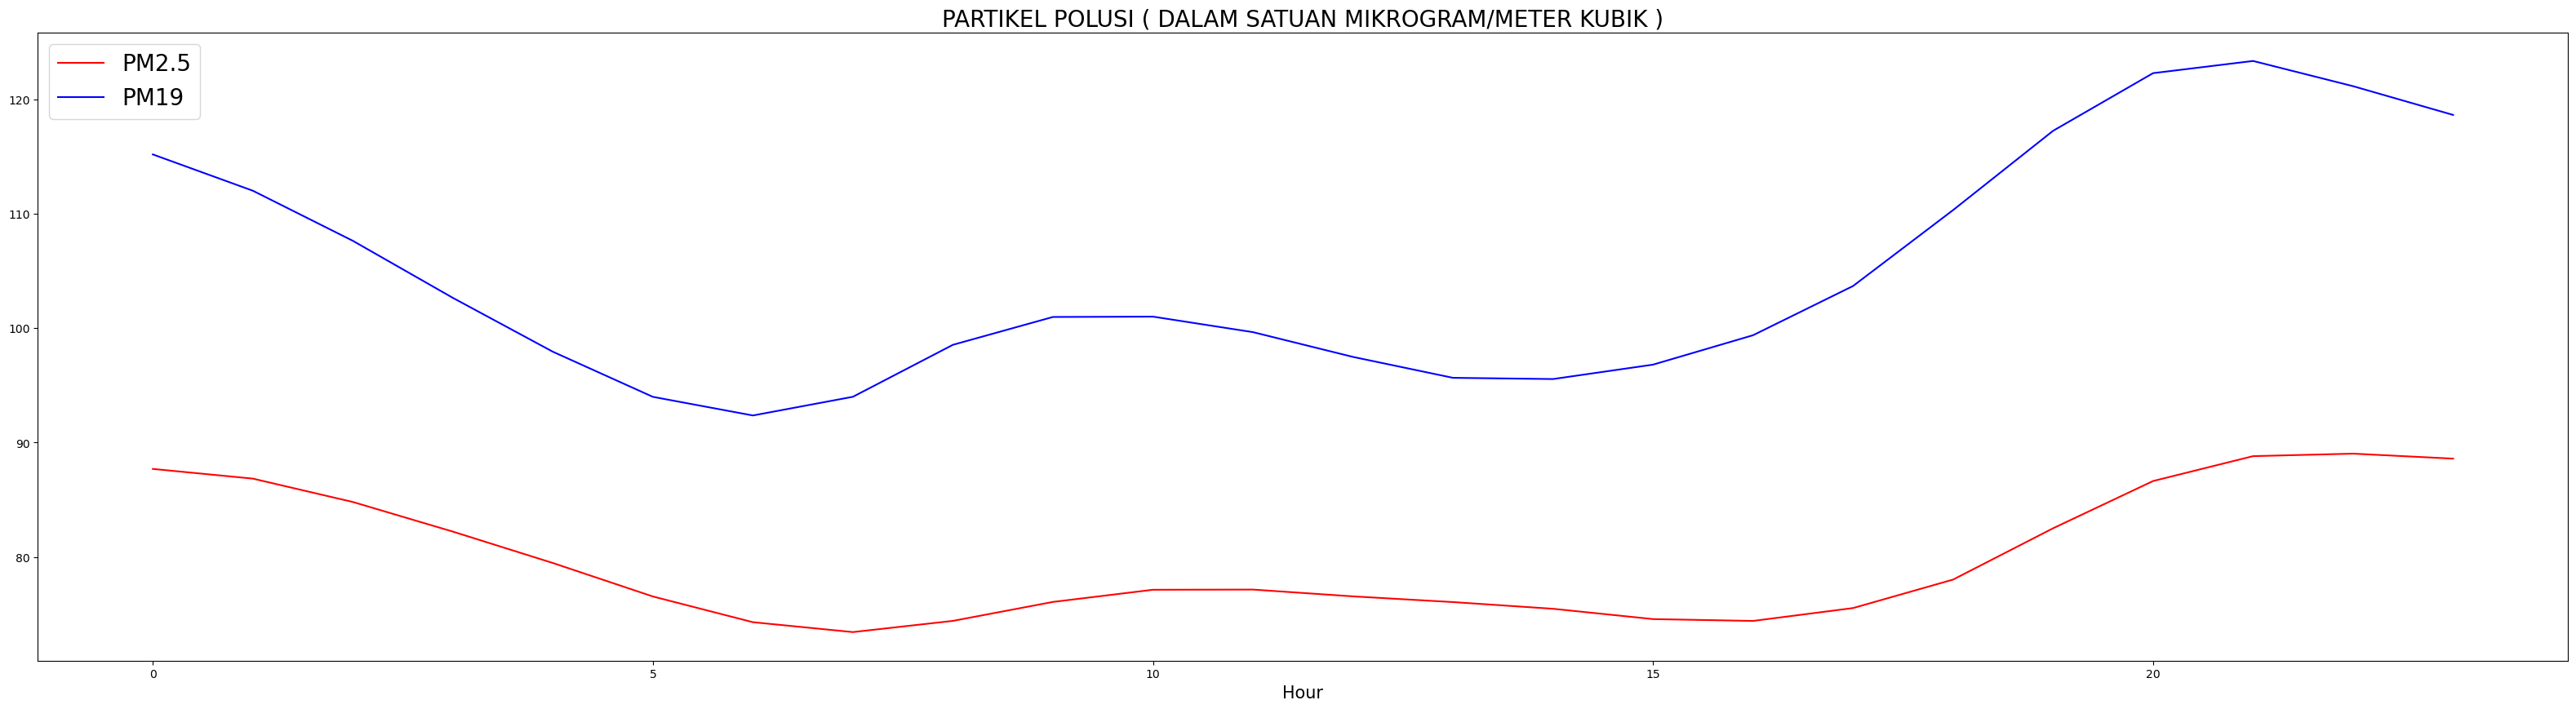

In [61]:
plt.figure(figsize=(40, 10))
plt.plot(all_city_df_day["hour"], all_city_df_day['PM2.5'], label='PM2.5', color='red')
plt.plot(all_city_df_day["hour"], all_city_df_day['PM10'], label='PM19', color='blue')
plt.title('PARTIKEL POLUSI ( DALAM SATUAN MIKROGRAM/METER KUBIK )', size=20)
plt.xlabel('Hour',size=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=20) 

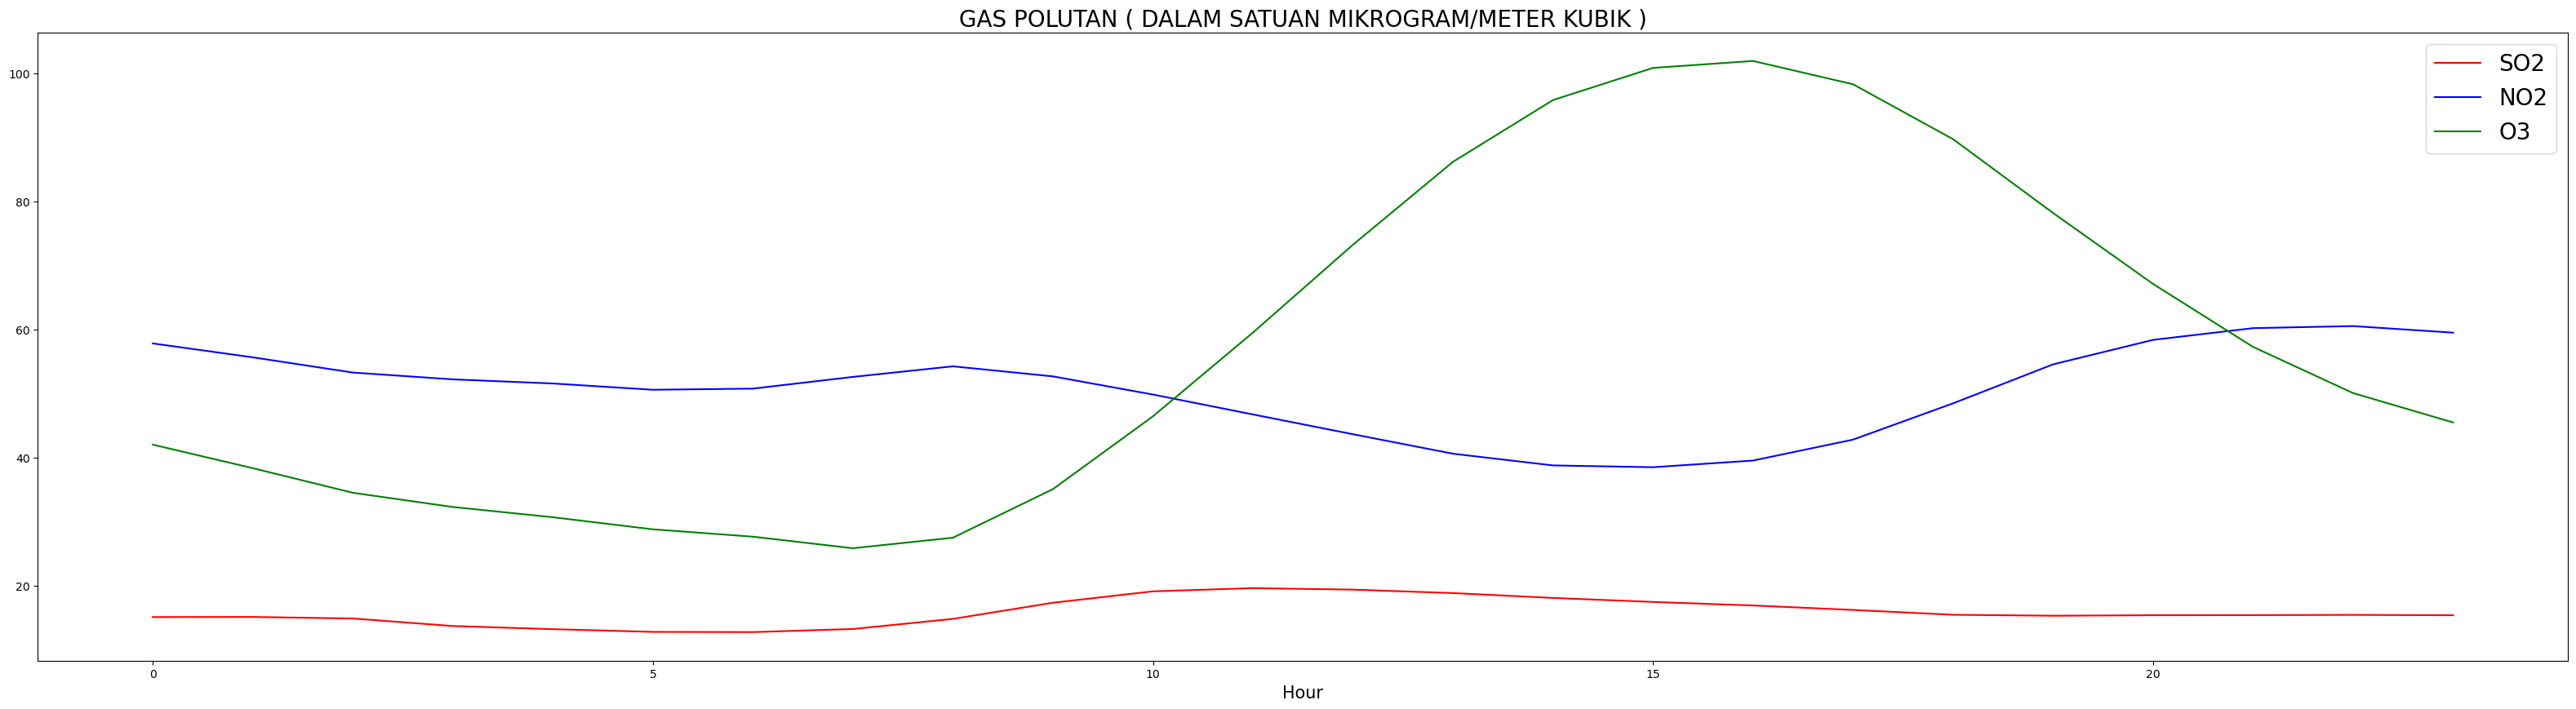

In [62]:
#dataframe yang akan digunakan all_city_df_hourly

plt.figure(figsize=(40, 10))
plt.plot(all_city_df_day["hour"], all_city_df_day['SO2'], label='SO2', color='red')
plt.plot(all_city_df_day["hour"], all_city_df_day['NO2'], label='NO2', color='blue')
plt.plot(all_city_df_day["hour"], all_city_df_day['O3'], label='O3', color='green')
plt.title('GAS POLUTAN ( DALAM SATUAN MIKROGRAM/METER KUBIK )', size=20)
plt.xlabel('Hour',size=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=20) 

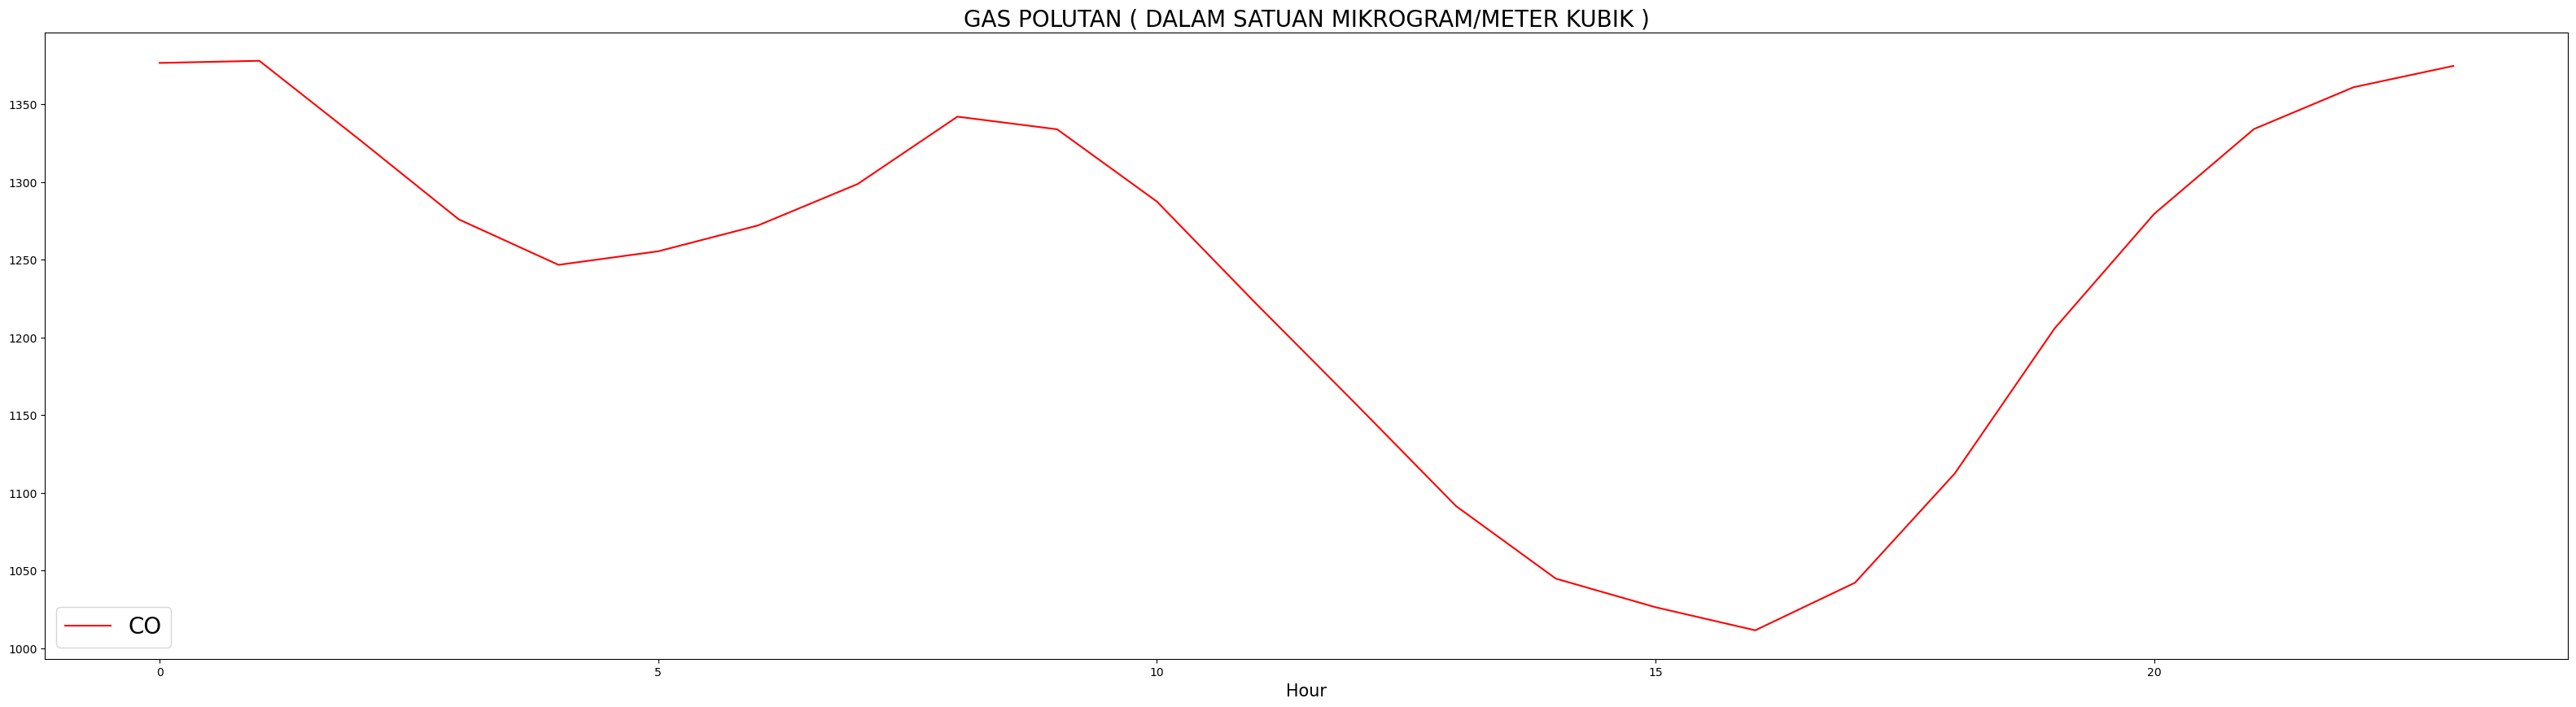

In [63]:
plt.figure(figsize=(40, 10))
plt.plot(all_city_df_day["hour"], all_city_df_day['CO'], label='CO', color='red')
plt.title('GAS POLUTAN ( DALAM SATUAN MIKROGRAM/METER KUBIK )', size=20)
plt.xlabel('Hour',size=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=20)


POLUSI UDARA BULANAN

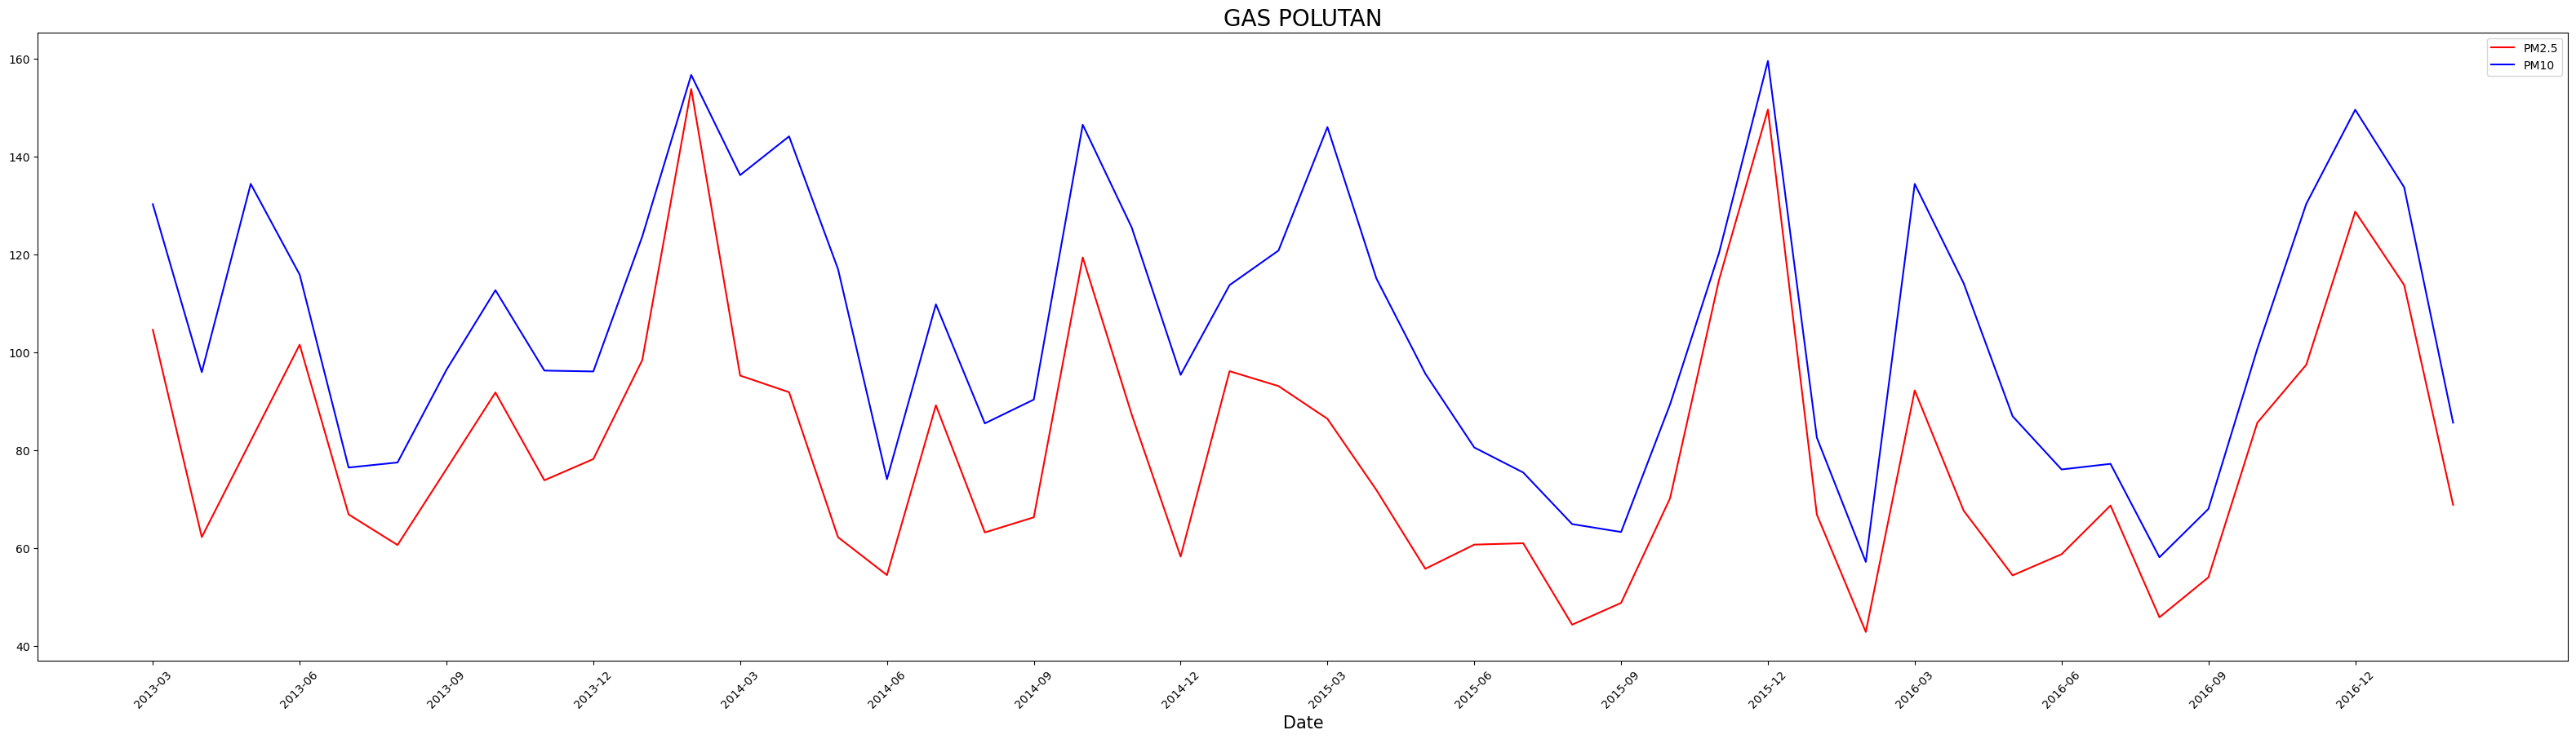

In [64]:
#dataframe rata rate bulaan
x_labels = all_city_df_year_month["year_month"][::3]

plt.figure(figsize=(40, 10))
plt.plot(all_city_df_year_month["year_month"], all_city_df_year_month['PM2.5'], label='PM2.5', color='red')
plt.plot(all_city_df_year_month["year_month"], all_city_df_year_month['PM10'], label='PM10', color='blue')     
plt.title('GAS POLUTAN', size=20)
plt.xlabel('Date',size=15)
plt.xticks(fontsize=8)
plt.xticks(ticks=x_labels, labels=x_labels, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()

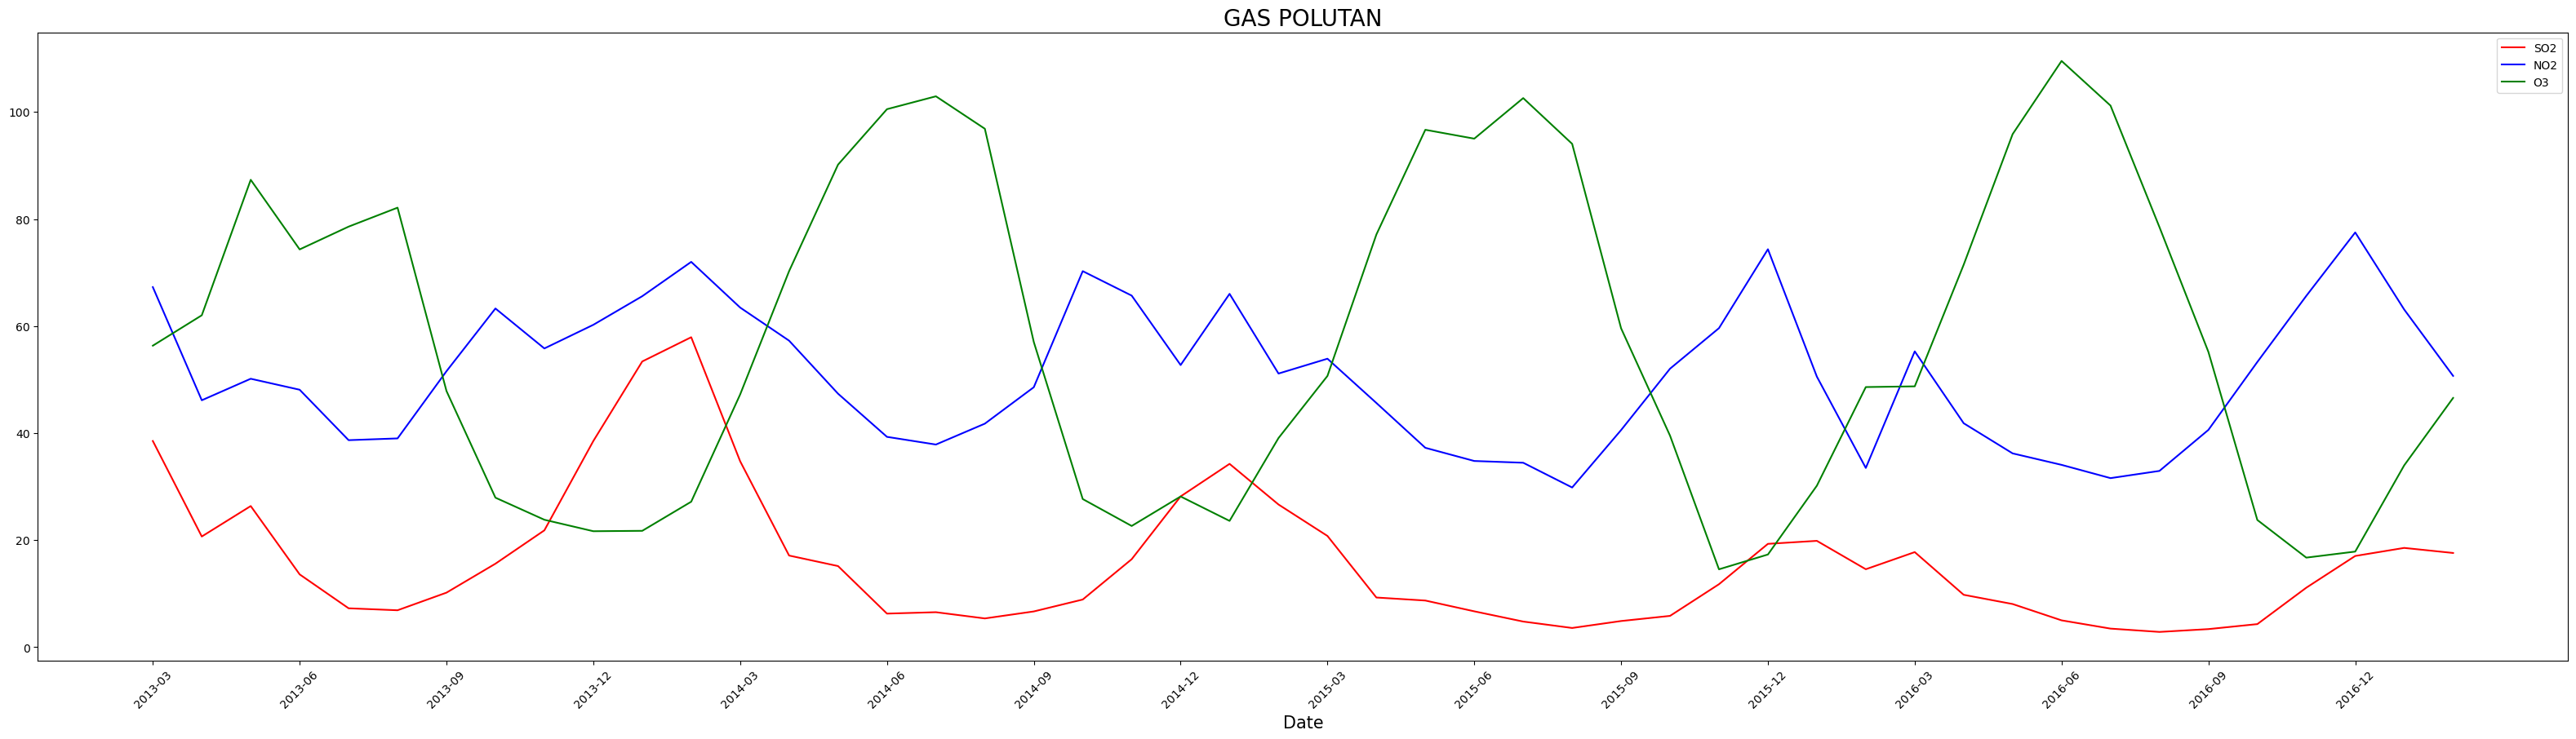

In [65]:
#dataframe rata rate bulaan
x_labels = all_city_df_year_month["year_month"][::3]

plt.figure(figsize=(40, 10))
plt.plot(all_city_df_year_month["year_month"], all_city_df_year_month['SO2'], label='SO2', color='red')
plt.plot(all_city_df_year_month["year_month"], all_city_df_year_month['NO2'], label='NO2', color='blue')
plt.plot(all_city_df_year_month["year_month"], all_city_df_year_month['O3'], label='O3', color='green')
plt.title('GAS POLUTAN', size=20)
plt.xlabel('Date',size=15)
plt.xticks(fontsize=8)
plt.xticks(ticks=x_labels, labels=x_labels, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()

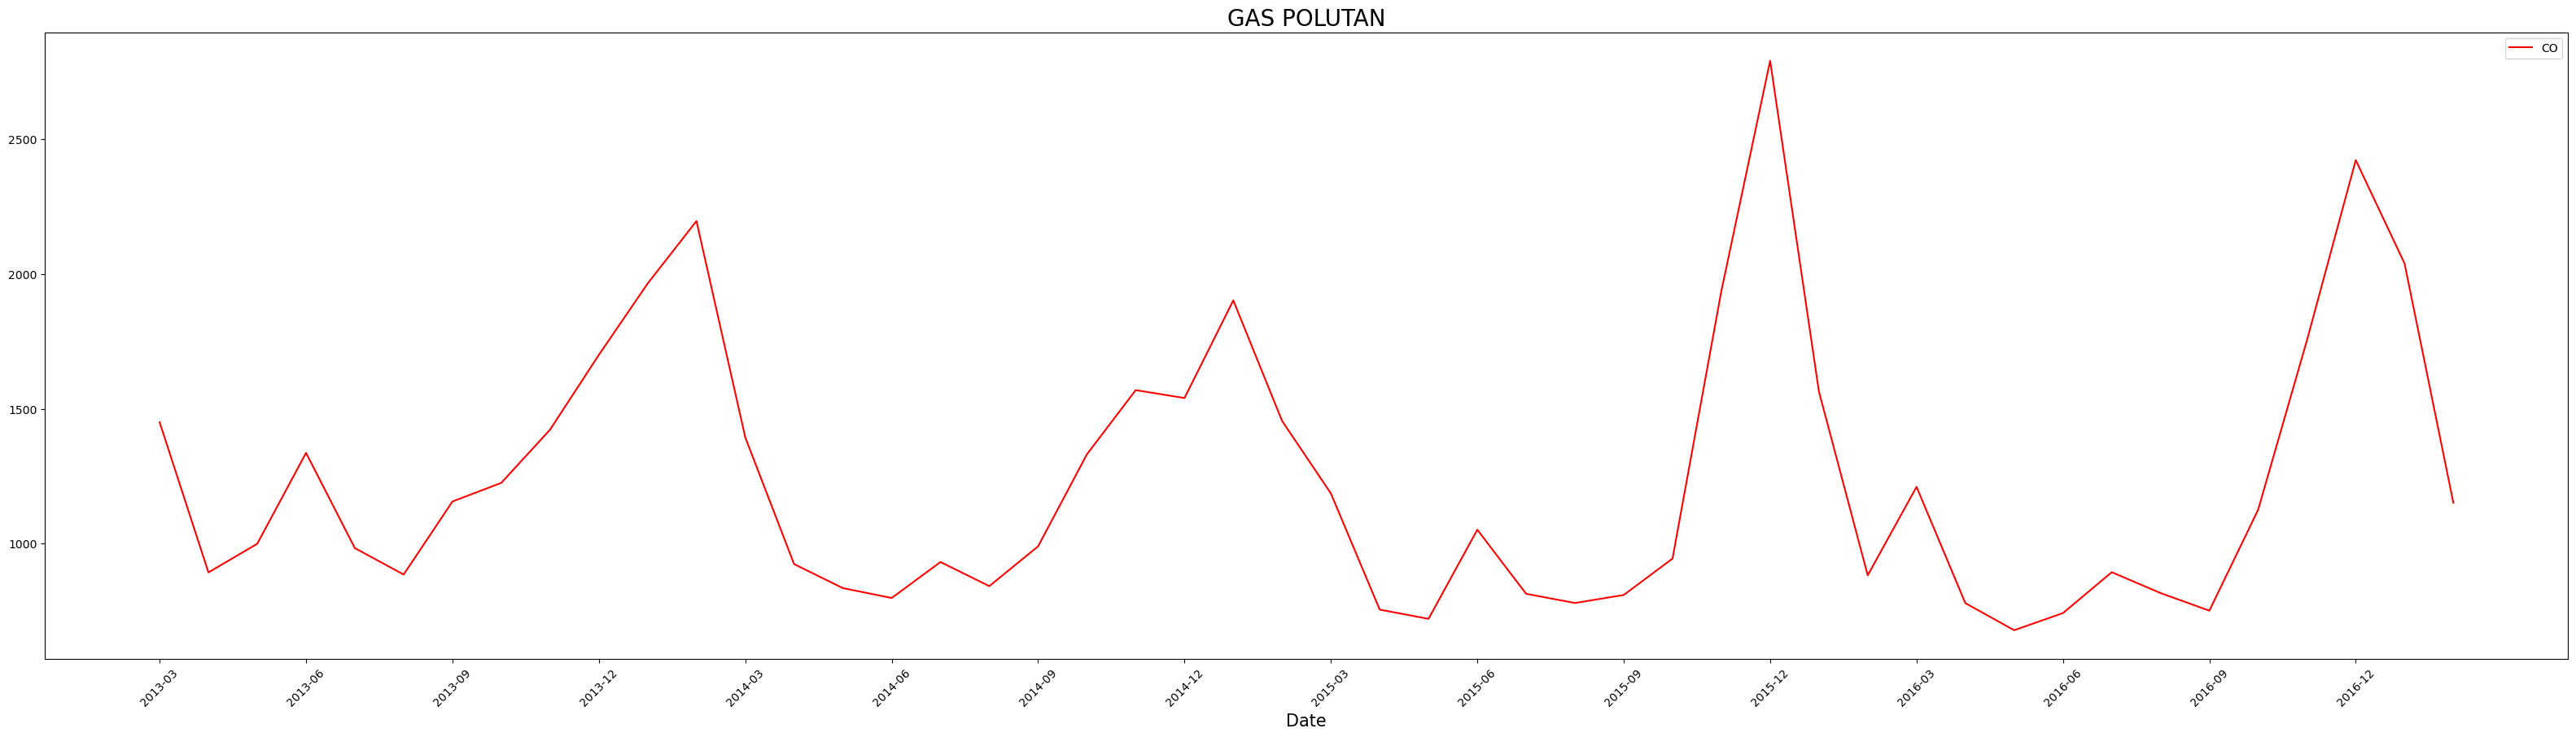

In [66]:
x_labels = all_city_df_year_month["year_month"][::3]

plt.figure(figsize=(40, 10))
plt.plot(all_city_df_year_month["year_month"], all_city_df_year_month['CO'], label='CO', color='red')
plt.title('GAS POLUTAN', size=20)
plt.xlabel('Date',size=15)
plt.xticks(fontsize=8)
plt.xticks(ticks=x_labels, labels=x_labels, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()

POLUSI UDARA PERMUSIM

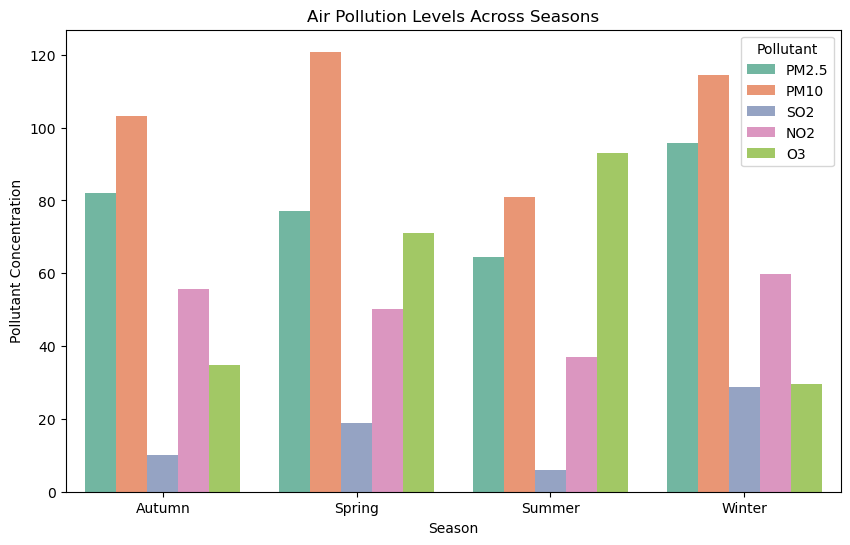

In [67]:
# Reshape data biar bisa dipake di Seaborn (from wide to long format)
all_city_df_season_melted = all_city_df_season.melt(id_vars="season", var_name="Pollutant", value_name="Concentration")

#hapus pameter lingkungan
all_city_df_season_melted = all_city_df_season_melted[~all_city_df_season_melted["Pollutant"].isin(["CO", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"])]

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="Concentration", hue="Pollutant", data=all_city_df_season_melted, palette="Set2")

# Tambahin label & judul
plt.xlabel("Season")
plt.ylabel("Pollutant Concentration")
plt.title("Air Pollution Levels Across Seasons")
plt.legend(title="Pollutant")

# Tampilkan plot
plt.show()

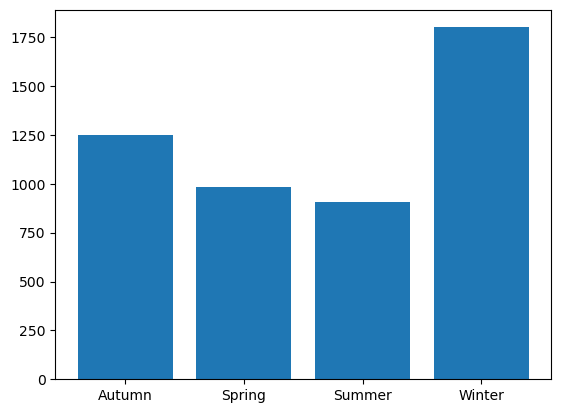

In [68]:
plt.bar(x=all_city_df_season["season"], height=all_city_df_season["CO"])
plt.show()

### <a id='toc1_5_2_'></a>[Pertanyaan 2: Bagaimana hubungan antara tingkat polusi udara dan kondisi lingkungan?](#toc0_)

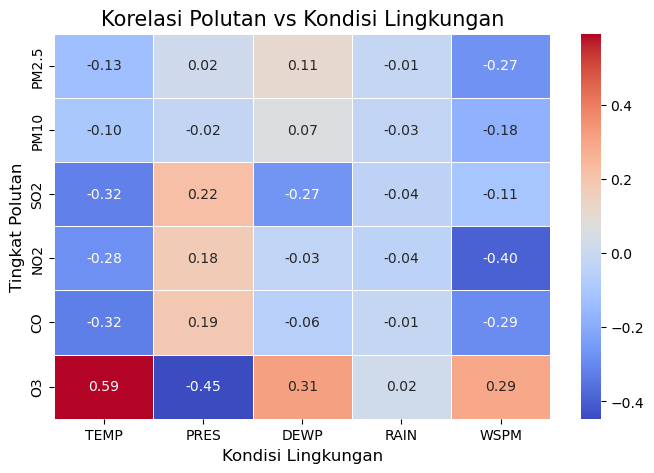

In [69]:

pollutants_gas = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
env_conditions= ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

# korelasi antara parameter udara dan kondisi lingkungan
corr_matrix_env_polutants = all_city_df[pollutants_gas + env_conditions].corr()
corr_matrix_env_polutants = corr_matrix_env_polutants.loc[pollutants_gas, env_conditions]

#Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix_env_polutants, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Korelasi Polutan vs Kondisi Lingkungan", fontsize=15)
plt.xlabel("Kondisi Lingkungan", fontsize=12)
plt.ylabel("Tingkat Polutan", fontsize=12)

plt.show()

### <a id='toc1_5_2_'></a>[Pertanyaan 3: Bagaimana Perbedaan kondisi lingkungan dari tiap kota? ](#toc0_)

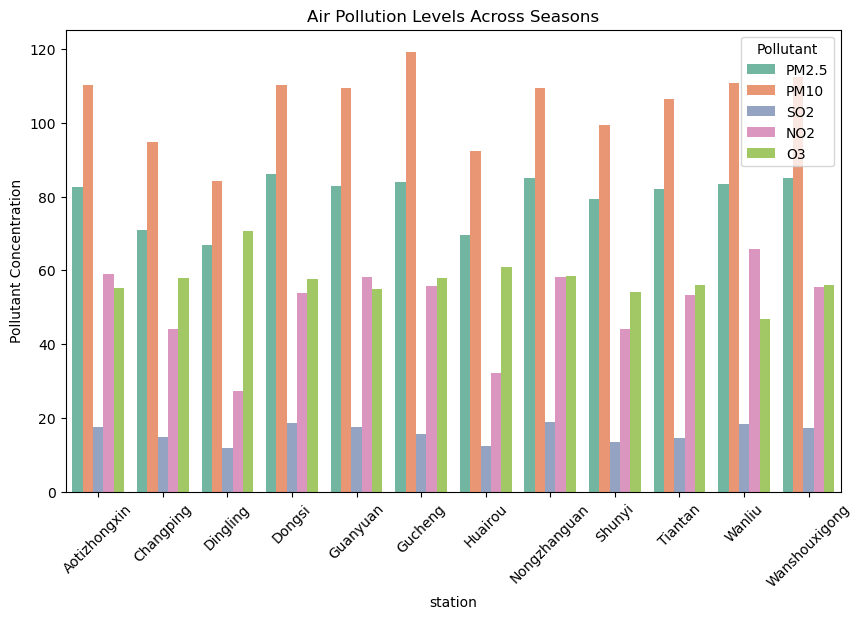

In [70]:
# Reshape data biar bisa dipake di Seaborn (from wide to long format)
all_city_df_station_melted = all_city_df_station.melt(id_vars="station", var_name="Pollutant", value_name="Concentration")

#hapus pameter lingkungan
all_city_df_station_melted = all_city_df_station_melted[~all_city_df_station_melted["Pollutant"].isin(["CO", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"])]

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="station", y="Concentration", hue="Pollutant", data=all_city_df_station_melted, palette="Set2")

# Tambahin label & judul
plt.xlabel("station")
plt.ylabel("Pollutant Concentration")
plt.title("Air Pollution Levels Across Seasons")
plt.legend(title="Pollutant")
plt.xticks(rotation=45)  

# Tampilkan plot
plt.show()

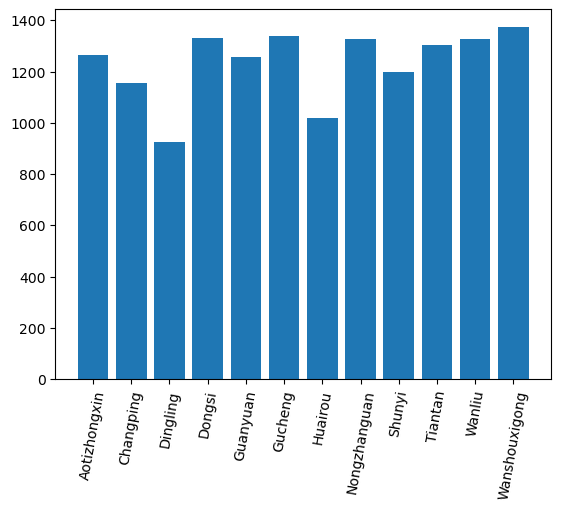

In [71]:
plt.bar(x=all_city_df_station["station"], height=all_city_df_station["CO"])
plt.xticks(rotation=80)  
plt.show()

**Insight:**
- Partikel halus (PM2.5 & PM10) : Meningkat di sore hari kemudian cendurung menurun menjelang tengah malam
- Ozon (O₃): Cenderung meningkat menjelang tengah hari dan menurun saat malam. Ini kemungkinan besar dipengaruhi oleh intensitas sinar matahari yang berperan dalam pembentukan ozon di atmosfer.
- Sulfur Dioksida (SO₂) & Nitrogen Dioksida (NO₂): Tidak menunjukkan peningkatan signifikan sepanjang hari, yang mungkin mengindikasikan bahwa sumber emisinya cukup stabil.
- Karbon Monoksida (CO): Menurun dari pagi hingga siang, lalu naik kembali di sore hari dan mencapai puncaknya tengah malam. Hal ini bisa dikaitkan dengan aktivitas kendaraan bermotor dan penggunaan bahan bakar yang meningkat pada malam hari.
- Pola pergerakan PM2.5 dan PM10 cenderung mengikuti tren yang sama, dengan PM10 selalu memiliki nilai lebih tinggi dibanding PM2.5. Ini sesuai dengan karakteristiknya, di mana PM10 mencakup partikel yang lebih besar dibandingkan PM2.5.
- Ozon (O₃): Memiliki pola musiman, dengan kadar tertinggi di pertengahan tahun (sekitar bulan 6-7) dan menurun setelahnya. Kemungkinan besar ini dipengaruhi oleh peningkatan sinar matahari dan suhu yang lebih tinggi selama musim panas.
- NO₂, CO, dan SO₂: Menunjukkan pola kebalikan dari O₃, dengan kadar tertinggi di awal dan akhir tahun. Ini bisa disebabkan oleh peningkatan aktivitas industri, pembakaran bahan bakar, atau inversi suhu  Inversi suhu (udara dingin di permukaan terperangkap di bawah udara hangat).
- Kadar 03 memiliki korelasi kuat dengan suhu lingkungan.
- Kadar hujan tidak memiliki pengaruh signifikan terhadapa polusi udara
- Kota Dingling memiliki rata rata tingkat gas dan zat polusi terendah.

## <a id='toc1_7_'></a>[Conclusion](#toc0_)

Pola peningkatan polusi udara menunjukkan variasi harian dan musiman yang dipengaruhi oleh faktor lingkungan dan aktivitas manusia. Secara harian, Partikerl halus meningkat pada sore hari dan cenderung menurun menjelang tengah malam. Kemudian, kadar Ozon (O₃) meningkat menjelang tengah hari akibat intensitas sinar matahari dan menurun pada malam hari, sementara Karbon Monoksida (CO) cenderung turun dari pagi ke siang lalu meningkat kembali hingga puncaknya di tengah malam, kemungkinan besar karena aktivitas kendaraan dan pembakaran bahan bakar. Sebaliknya, Sulfur Dioksida (SO₂) dan Nitrogen Dioksida (NO₂) tidak menunjukkan perubahan signifikan sepanjang hari, yang mengindikasikan sumber emisi yang stabil. Secara musiman, kadar O₃ mencapai puncaknya pada pertengahan tahun (musim panas) akibat peningkatan suhu dan sinar matahari, sedangkan NO₂, CO, dan SO₂ justru mengalami peningkatan di awal dan akhir tahun, kemungkinan besar akibat peningkatan aktivitas industri serta fenomena inversi suhu yang memperangkap polutan di lapisan udara dekat permukaan.

Tingkat polusi udara memiliki hubungan yang cukup erat dengan suhu, terutama Ozon (O₃) yang menunjukkan korelasi positif sebesar 0.59, menandakan bahwa semakin tinggi suhu, semakin tinggi pula kadar O₃ di udara. Sebaliknya, curah hujan tidak memiliki pengaruh signifikan terhadap kadar polutan, terbukti dari nilai korelasi yang sangat kecil untuk semua jenis polutan. Hal ini menunjukkan bahwa meskipun hujan sering dianggap dapat membersihkan udara, dalam kasus ini, dampaknya terhadap konsentrasi polutan tidak signifikan.

Secara keseluruhan, tidak terdapat perbedaan yang signifikan dalam tingkat polusi di setiap kota, yang mengindikasikan bahwa aktivitas pembakaran di masing-masing kota kemungkinan memiliki intensitas yang serupa. Namun, Kota Dingling menunjukkan rata-rata kadar gas dan zat polutan terendah dibandingkan kota lainnya.

In [72]:
#export data to csv folder dasbhoard
all_city_df.to_csv("dashboard/all_city_df.csv", index=False)
